In [223]:
import pandas as pd
import numpy as np
!pip install streamlit

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [224]:
import os
print(os.getcwd())

cars_data = pd.read_csv(r'data\Cardetails.csv')

d:\ml_project\src\notebook


In [225]:
cars_data.shape

(8128, 13)

In [226]:
cars_data.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0


In [227]:
cars_data.isna().sum()

name               0
year               0
selling_price      0
km_driven          0
fuel               0
seller_type        0
transmission       0
owner              0
mileage          221
engine           221
max_power        215
torque           222
seats            221
dtype: int64

there are null values in the data set.

In [228]:
cars_data.duplicated().sum()

1202

there are also duplicate values present in the data set 

In [229]:
cars_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8128 entries, 0 to 8127
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           8128 non-null   object 
 1   year           8128 non-null   int64  
 2   selling_price  8128 non-null   int64  
 3   km_driven      8128 non-null   int64  
 4   fuel           8128 non-null   object 
 5   seller_type    8128 non-null   object 
 6   transmission   8128 non-null   object 
 7   owner          8128 non-null   object 
 8   mileage        7907 non-null   object 
 9   engine         7907 non-null   object 
 10  max_power      7913 non-null   object 
 11  torque         7906 non-null   object 
 12  seats          7907 non-null   float64
dtypes: float64(1), int64(3), object(9)
memory usage: 825.6+ KB


there are 4 numerical features and 9 catorical features

In [230]:
cars_data.describe()

,year,selling_price,km_driven,seats
count,8128.000000,8.128000e+03,8.128000e+03,7907.000000
mean,2013.804011,6.382718e+05,6.981951e+04,5.416719
std,4.044249,8.062534e+05,5.655055e+04,0.959588
min,1983.000000,2.999900e+04,1.000000e+00,2.000000
25%,2011.000000,2.549990e+05,3.500000e+04,5.000000
50%,2015.000000,4.500000e+05,6.000000e+04,5.000000
75%,2017.000000,6.750000e+05,9.800000e+04,5.000000
max,2020.000000,1.000000e+07,2.360457e+06,14.000000


In [231]:
cars_data.drop(columns=['torque'], inplace=True)

In [232]:
cars_data.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,5.0


In [233]:
cars_data.shape

(8128, 12)

#preprocessing

In [234]:
#NULL ChecK

In [235]:
cars_data.isnull().sum()

name               0
year               0
selling_price      0
km_driven          0
fuel               0
seller_type        0
transmission       0
owner              0
mileage          221
engine           221
max_power        215
seats            221
dtype: int64

In [236]:
cars_data.dropna(inplace=True)

In [237]:
cars_data.shape

(7907, 12)

In [238]:
#Duplicate Check

In [239]:
cars_data.duplicated().sum()

1189

In [240]:
cars_data.drop_duplicates(inplace=True)

In [241]:
cars_data.shape

(6718, 12)

In [242]:
cars_data

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...
8121,Maruti Wagon R VXI BS IV with ABS,2013,260000,50000,Petrol,Individual,Manual,Second Owner,18.9 kmpl,998 CC,67.1 bhp,5.0
8122,Hyundai i20 Magna 1.4 CRDi,2014,475000,80000,Diesel,Individual,Manual,Second Owner,22.54 kmpl,1396 CC,88.73 bhp,5.0
8123,Hyundai i20 Magna,2013,320000,110000,Petrol,Individual,Manual,First Owner,18.5 kmpl,1197 CC,82.85 bhp,5.0
8124,Hyundai Verna CRDi SX,2007,135000,119000,Diesel,Individual,Manual,Fourth & Above Owner,16.8 kmpl,1493 CC,110 bhp,5.0


In [243]:
car_name = []
# Assign the 'name' column from the DataFrame to the list
car_name = cars_data['name'].tolist()

In [244]:
# splitting brand name, car name and variant
brands = []
car_names = []
variants = []

for car_desc in car_name:
    words = car_desc.split()

    brand = words[0]
    brands.append(brand)

    carnames = " ".join(words[1:2])
    car_names.append(carnames)
    
    variant = words[2]
    variants.append(variant)

In [245]:
cars_data[['brands', 'car_names', 'variants']] = cars_data['name'].str.split(' ', n=2, expand=True)

# Drop the original 'name' column
cars_data = cars_data.drop(columns=['name'])


In [246]:
insurance = ['Comprehensive', 'Third Party', 'Comprehensive', 'Comprehensive', 'Third Party'] * (6718 // 5) + ['Comprehensive'] * (6718 % 5)
cars_data['insurance'] = insurance

In [247]:
carData=cars_data.copy()

In [248]:
cars_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6718 entries, 0 to 8125
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   year           6718 non-null   int64  
 1   selling_price  6718 non-null   int64  
 2   km_driven      6718 non-null   int64  
 3   fuel           6718 non-null   object 
 4   seller_type    6718 non-null   object 
 5   transmission   6718 non-null   object 
 6   owner          6718 non-null   object 
 7   mileage        6718 non-null   object 
 8   engine         6718 non-null   object 
 9   max_power      6718 non-null   object 
 10  seats          6718 non-null   float64
 11  brands         6718 non-null   object 
 12  car_names      6718 non-null   object 
 13  variants       6718 non-null   object 
 14  insurance      6718 non-null   object 
dtypes: float64(1), int64(3), object(11)
memory usage: 839.8+ KB


In [249]:
file_name = 'cars_data_copy.csv'

# Save the DataFrame to a CSV file
cars_data.to_csv(file_name, index=False)

In [250]:
cars_data.describe()

,year,selling_price,km_driven,seats
count,6718.000000,6.718000e+03,6.718000e+03,6718.000000
mean,2013.609110,5.263196e+05,7.340230e+04,5.434653
std,3.900648,5.235398e+05,5.869980e+04,0.984230
min,1994.000000,2.999900e+04,1.000000e+00,2.000000
25%,2011.000000,2.500000e+05,3.800000e+04,5.000000
50%,2014.000000,4.200000e+05,6.822150e+04,5.000000
75%,2017.000000,6.500000e+05,1.000000e+05,5.000000
max,2020.000000,1.000000e+07,2.360457e+06,14.000000


In [251]:
brands

['Maruti',
 'Skoda',
 'Honda',
 'Hyundai',
 'Maruti',
 'Hyundai',
 'Maruti',
 'Maruti',
 'Toyota',
 'Ford',
 'Renault',
 'Maruti',
 'Maruti',
 'Maruti',
 'Mahindra',
 'Maruti',
 'Hyundai',
 'Maruti',
 'Hyundai',
 'Mahindra',
 'Honda',
 'Maruti',
 'Maruti',
 'Tata',
 'Maruti',
 'Maruti',
 'Chevrolet',
 'Maruti',
 'Maruti',
 'Maruti',
 'Maruti',
 'Hyundai',
 'Maruti',
 'Maruti',
 'Maruti',
 'Hyundai',
 'Datsun',
 'Tata',
 'Maruti',
 'Jeep',
 'Honda',
 'Honda',
 'Maruti',
 'Maruti',
 'Maruti',
 'Toyota',
 'Toyota',
 'Mercedes-Benz',
 'Honda',
 'Mitsubishi',
 'Honda',
 'Maruti',
 'Honda',
 'Toyota',
 'Toyota',
 'Audi',
 'Toyota',
 'Audi',
 'Mercedes-Benz',
 'Tata',
 'Hyundai',
 'Hyundai',
 'Maruti',
 'Ford',
 'Maruti',
 'Volkswagen',
 'Honda',
 'Maruti',
 'Volkswagen',
 'Maruti',
 'Maruti',
 'Hyundai',
 'Maruti',
 'Toyota',
 'Maruti',
 'Maruti',
 'Volkswagen',
 'Toyota',
 'Ford',
 'BMW',
 'Maruti',
 'Datsun',
 'Maruti',
 'Maruti',
 'Hyundai',
 'Maruti',
 'Maruti',
 'Volkswagen',
 'Hyundai'

In [252]:
car_names

['Swift',
 'Rapid',
 'City',
 'i20',
 'Swift',
 'Xcent',
 'Wagon',
 '800',
 'Etios',
 'Figo',
 'Duster',
 'Zen',
 'Swift',
 'Wagon',
 'KUV',
 'Ertiga',
 'i20',
 'Alto',
 'i20',
 'Verito',
 'WR-V',
 'Swift',
 'SX4',
 'Tigor',
 'Baleno',
 'Alto',
 'Enjoy',
 'Wagon',
 'Omni',
 'Vitara',
 'Omni',
 'i20',
 'Vitara',
 'Alto',
 'Alto',
 'Verna',
 'GO',
 'Safari',
 '800',
 'Compass',
 'City',
 'City',
 'Swift',
 'Vitara',
 'Alto',
 'Fortuner',
 'Innova',
 'B',
 'Amaze',
 'Pajero',
 'City',
 'Ciaz',
 'Jazz',
 'Innova',
 'Innova',
 'A6',
 'Corolla',
 'A6',
 'New',
 'Manza',
 'i10',
 'i20',
 'Swift',
 'Figo',
 'Baleno',
 'Ameo',
 'City',
 'Wagon',
 'Ameo',
 'Vitara',
 'Vitara',
 'i10',
 'Swift',
 'Fortuner',
 'Swift',
 'Ertiga',
 'Vento',
 'Innova',
 'EcoSport',
 'X1',
 'Celerio',
 'GO',
 'Alto',
 'Alto',
 'i10',
 'Omni',
 'Wagon',
 'Polo',
 'i10',
 'Vento',
 'Zen',
 'i20',
 'Swift',
 'Xcent',
 'Alto',
 'i20',
 'Wagon',
 'Manza',
 'Swift',
 'Eeco',
 'Baleno',
 'Scorpio',
 'Freestyle',
 'Verna',
 

In [253]:
cars_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6718 entries, 0 to 8125
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   year           6718 non-null   int64  
 1   selling_price  6718 non-null   int64  
 2   km_driven      6718 non-null   int64  
 3   fuel           6718 non-null   object 
 4   seller_type    6718 non-null   object 
 5   transmission   6718 non-null   object 
 6   owner          6718 non-null   object 
 7   mileage        6718 non-null   object 
 8   engine         6718 non-null   object 
 9   max_power      6718 non-null   object 
 10  seats          6718 non-null   float64
 11  brands         6718 non-null   object 
 12  car_names      6718 non-null   object 
 13  variants       6718 non-null   object 
 14  insurance      6718 non-null   object 
dtypes: float64(1), int64(3), object(11)
memory usage: 839.8+ KB


In [254]:
#Data Analysis

In [255]:
for col in cars_data.columns:
    print('Unique values of ' + col)
    print(cars_data[col].unique())
    print("\n")

Unique values of year
[2014 2006 2010 2007 2017 2001 2011 2013 2005 2009 2016 2012 2002 2015
 2018 2019 2008 2020 1999 2000 2003 2004 1994 1998 1997 1995 1996]


Unique values of selling_price
[  450000   370000   158000   225000   130000   440000    96000    45000
   350000   200000   500000    92000   280000   180000   400000   778000
   150000   680000   174000   950000   525000   600000   575000   275000
   300000   220000   254999   670000   730000   650000   330000   366000
  1149000   425000  2100000   925000   675000   819999   390000  1500000
   700000  1450000  1090000   850000  1650000  1750000  1590000  1689999
  1425000   265000   190000   630000   540000   448000   745000  1025000
   235000  1700000  1200000   610000  2500000   484999   315000   290000
   455000   351000   535000   175000   565000   120000   725000   185000
   615000   270000   625000   866000   375000   522000   451999   475000
   780000   595000  1140000   360000   105000   135000   690000  3975000
  51

In [256]:
# def get_brand_name(car_name):
#     car_name = car_name.split(' ')[0]
#     return car_name.strip()

In [257]:
def clean_data(value):
    value = value.split(' ')[0]
    value = value.strip()
    if value == '':
        value = 0
    return float(value)

In [258]:
# get_brand_name('Maruti  Swift Dzire VDI')

In [259]:
# cars_data['name'].unique()

In [260]:
cars_data['mileage'] = cars_data['mileage'].apply(clean_data)

In [261]:
cars_data['max_power'] = cars_data['max_power'].apply(clean_data)

In [262]:
cars_data['engine'] = cars_data['engine'].apply(clean_data)

In [263]:
for col in cars_data.columns:
    print('Unique values of ' + col)
    print(cars_data[col].unique())
    print("======================")

Unique values of year
[2014 2006 2010 2007 2017 2001 2011 2013 2005 2009 2016 2012 2002 2015
 2018 2019 2008 2020 1999 2000 2003 2004 1994 1998 1997 1995 1996]
Unique values of selling_price
[  450000   370000   158000   225000   130000   440000    96000    45000
   350000   200000   500000    92000   280000   180000   400000   778000
   150000   680000   174000   950000   525000   600000   575000   275000
   300000   220000   254999   670000   730000   650000   330000   366000
  1149000   425000  2100000   925000   675000   819999   390000  1500000
   700000  1450000  1090000   850000  1650000  1750000  1590000  1689999
  1425000   265000   190000   630000   540000   448000   745000  1025000
   235000  1700000  1200000   610000  2500000   484999   315000   290000
   455000   351000   535000   175000   565000   120000   725000   185000
   615000   270000   625000   866000   375000   522000   451999   475000
   780000   595000  1140000   360000   105000   135000   690000  3975000
  5150

# encoding

In [313]:
cars_data['brands'].replace(['Maruti', 'Skoda', 'Honda', 'Hyundai', 'Toyota', 'Ford', 'Renault',
       'Mahindra', 'Tata', 'Chevrolet', 'Datsun', 'Jeep', 'Mercedes-Benz',
       'Mitsubishi', 'Audi', 'Volkswagen', 'BMW', 'Nissan', 'Lexus',
       'Jaguar', 'Land', 'MG', 'Volvo', 'Daewoo', 'Kia', 'Fiat', 'Force',
       'Ambassador', 'Ashok', 'Isuzu', 'Opel'],
                          [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31]
                          ,inplace=True)

# cars_data['car_names'].replace([
#  'Swift' 'Rapid' 'City' 'i20' 'Xcent' 'Wagon' '800' 'Etios' 'Figo'
#  'Duster' 'Zen' 'KUV' 'Ertiga' 'Alto' 'Verito' 'WR-V' 'SX4' 'Tigor'
#  'Baleno' 'Enjoy' 'Omni' 'Vitara' 'Verna' 'GO' 'Safari' 'Compass'
#  'Fortuner' 'Innova' 'B' 'Amaze' 'Pajero' 'Ciaz' 'Jazz' 'A6' 'Corolla'
#  'New' 'Manza' 'i10' 'Ameo' 'Vento' 'EcoSport' 'X1' 'Celerio' 'Polo'
#  'Eeco' 'Scorpio' 'Freestyle' 'Passat' 'Indica' 'XUV500' 'Indigo'
#  'Terrano' 'Creta' 'KWID' 'Santro' 'Q5' 'ES' 'XF' 'Wrangler' 'Rover'
#  'S-Class' '5' 'X4' 'Superb' 'E-Class' 'Hector' 'XC40' 'Q7' 'Elantra' 'XE'
#  'Nexon' 'CLA' 'Glanza' '3' 'Camry' 'XC90' 'Ritz' 'Grand' 'Matiz' 'Zest'
#  'Getz' 'Elite' 'Brio' 'Hexa' 'Sunny' 'Micra' 'Ssangyong' 'Quanto'
#  'Accent' 'Ignis' 'Marazzo' 'Tiago' 'Thar' 'Sumo' 'Bolero' 'GL-Class'
#  'Beat' 'A-Star' 'XUV300' 'Nano' 'GTI' 'V40' 'CR-V' 'EON' 'RediGO'
#  'Captiva' 'Fiesta' 'Seltos' 'Civic' 'Sail' 'Venture' 'Classic' 'BR-V'
#  'Ecosport' 'Aria' 'TUV' 'Bolt' 'Accord' 'Xylo' 'Grande' 'S-Cross' 'Yaris'
#  'Tavera' 'Linea' 'Endeavour' 'Aveo' 'Triber' 'Fusion' 'Octavia' 'A4'
#  'XL6' 'Santa' 'Spark' 'Aspire' 'Optra' 'Mobilio' 'BRV' 'X6' 'Cruze' 'GLA'
#  '6' 'NuvoSport' 'Scala' 'Lodgy' 'Pulse' 'Supro' 'Sonata' 'Renault'
#  'Kicks' 'Jetta' 'M-Class' 'Teana' 'Yeti' 'Q3' 'Gurkha' 'Logan' 'A3'
#  'Dzire' 'Ikon' 'Fluence' 'Xenon' 'One'  'S60' 'Lancer' 'X7' 'Fabia'
#  'Platinum' 'Captur' 'Gypsy' 'Koleos' 'CLASSIC' 'Harrier' 'Punto'
#  'Avventura' 'Laura' 'Leyland' 'MUX' 'Astra' 'Tucson' 'Esteem' 'Winger'
#  'Qualis' 'Spacio' 'Venue' 'CrossPolo' 'Kodiaq' 'D-Max' 'X3' 'Land' 'X5'
#  'Trailblazer' 'MU' 'GLC' 'XC60' 'S90' 'S-Presso'],[1, 2, 3, 4, 5, 6, 7, 8, 9,
#                                                     10, 11, 12, 13, 14, 15, 16, 17, 18,
#                                                     19, 20, 21, 22, 23, 24, 25, 26, 27,
#                                                     28, 29, 30, 31, 32, 33, 34, 35, 36,
#                                                     37, 38, 39, 40, 41, 42, 43, 44, 45,
#                                                     46, 47, 48, 49, 50, 51, 52, 53, 54,
#                                                     55, 56, 57, 58, 59, 60, 61, 62, 63, 
#                                                     64, 65, 66, 67, 68, 69, 70, 71, 72,
#                                                      73, 74, 75, 76, 77, 78, 79, 80, 81,
#                                                     82, 83, 84, 85, 86, 87, 88, 89, 90,
#                                                     91, 92, 93, 94, 95, 96, 97, 98, 99,
#                                                     100, 101, 102, 103, 104, 105, 106, 107, 108,
#                                                     109, 110, 111, 112, 113, 114, 115, 116, 117,
#                                                     118, 119, 120, 121, 122, 123, 124, 125, 126,
#                                                     127, 128, 129, 130, 131, 132, 133, 134, 135, 
#                                                     136, 137, 138, 139, 140, 141, 142, 143, 144, 
#                                                     145, 146, 147, 148, 149, 150, 151, 152, 153, 
#                                                     154, 155, 156, 157, 158, 159, 160, 161, 162, 
#                                                     163, 164, 165, 166, 167, 168, 169, 170, 171, 
#                                                     172, 173, 174, 175, 176, 177, 178, 179, 180, 
#                                                     181, 182, 183, 184, 185, 186, 187, 188, 189, 
#                                                     190, 191, 192, 193, 194, 195, 196, 197, 198, 
#                                                     199, 200, 201, 202, 203,204],inplace=True)

# from sklearn.preprocessing import LabelEncoder
# labelencoder=LabelEncoder()
# cars_data['car_names']=labelencoder.fit_transform(cars_data['car_names'])
# # cars_data['brands'].unique()
# cars_data['car_names'].unique()

In [314]:
import pandas as pd

# Assuming cars_data is your DataFrame
cars_data['car_names'].replace([
    'Swift', 'Rapid', 'City', 'i20', 'Xcent', 'Wagon', '800', 'Etios', 'Figo',
    'Duster', 'Zen', 'KUV', 'Ertiga', 'Alto', 'Verito', 'WR-V', 'SX4', 'Tigor',
    'Baleno', 'Enjoy', 'Omni', 'Vitara', 'Verna', 'GO', 'Safari', 'Compass',
    'Fortuner', 'Innova', 'B', 'Amaze', 'Pajero', 'Ciaz', 'Jazz', 'A6', 'Corolla',
    'New', 'Manza', 'i10', 'Ameo', 'Vento', 'EcoSport', 'X1', 'Celerio', 'Polo',
    'Eeco', 'Scorpio', 'Freestyle', 'Passat', 'Indica', 'XUV500', 'Indigo',
    'Terrano', 'Creta', 'KWID', 'Santro', 'Q5', 'ES', 'XF', 'Wrangler', 'Rover',
    'S-Class', '5', 'X4', 'Superb', 'E-Class', 'Hector', 'XC40', 'Q7', 'Elantra', 'XE',
    'Nexon', 'CLA', 'Glanza', '3', 'Camry', 'XC90', 'Ritz', 'Grand', 'Matiz', 'Zest',
    'Getz', 'Elite', 'Brio', 'Hexa', 'Sunny', 'Micra', 'Ssangyong', 'Quanto',
    'Accent', 'Ignis', 'Marazzo', 'Tiago', 'Thar', 'Sumo', 'Bolero', 'GL-Class',
    'Beat', 'A-Star', 'XUV300', 'Nano', 'GTI', 'V40', 'CR-V', 'EON', 'RediGO',
    'Captiva', 'Fiesta', 'Seltos', 'Civic', 'Sail', 'Venture', 'Classic', 'BR-V',
    'Ecosport', 'Aria', 'TUV', 'Bolt', 'Accord', 'Xylo', 'Grande', 'S-Cross', 'Yaris',
    'Tavera', 'Linea', 'Endeavour', 'Aveo', 'Triber', 'Fusion', 'Octavia', 'A4',
    'XL6', 'Santa', 'Spark', 'Aspire', 'Optra', 'Mobilio', 'BRV', 'X6', 'Cruze', 'GLA',
    '6', 'NuvoSport', 'Scala', 'Lodgy', 'Pulse', 'Supro', 'Sonata', 'Renault',
    'Kicks', 'Jetta', 'M-Class', 'Teana', 'Yeti', 'Q3', 'Gurkha', 'Logan', 'A3',
    'Dzire', 'Ikon', 'Fluence', 'Xenon', 'One', 'S60', 'Lancer', 'X7', 'Fabia',
    'Platinum', 'Captur', 'Gypsy', 'Koleos', 'CLASSIC', 'Harrier', 'Punto',
    'Avventura', 'Laura', 'Leyland', 'MUX', 'Astra', 'Tucson', 'Esteem', 'Winger',
    'Qualis', 'Spacio', 'Venue', 'CrossPolo', 'Kodiaq', 'D-Max', 'X3', 'Land', 'X5',
    'Trailblazer', 'MU', 'GLC', 'XC60', 'S90', 'S-Presso'
], list(range(1, 197)), inplace=True)


In [315]:
# Verify the unique car names
unique_car_names = cars_data['car_names'].unique()

# Print unique car names to verify
print(unique_car_names)

# Corrected replace with a matching list of 196 values (adjust this list as needed)
cars_data['car_names'].replace(
    unique_car_names,  # This list should be the exact unique car names
    [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 
    32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 
    60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 
    88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 
    113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 
    136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 
    159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 
    182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197],  # 196 replacement values
    inplace=True
)



[  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36
  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54
  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72
  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90
  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107 108
 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126
 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144
 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161 162
 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179 180
 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197]


In [316]:
cars_data['transmission'].unique()

array([1, 2], dtype=int64)

In [317]:
cars_data['transmission'].replace(['Manual', 'Automatic'],[1,2], inplace=True)

In [318]:
cars_data['seller_type'].unique()

array([1, 2, 3], dtype=int64)

In [319]:
cars_data['seller_type'].replace(['Individual', 'Dealer', 'Trustmark Dealer'],[1,2,3], inplace=True)

In [320]:
cars_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6716 entries, 0 to 6717
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   year           6716 non-null   int64  
 1   selling_price  6716 non-null   int64  
 2   km_driven      6716 non-null   int64  
 3   fuel           6716 non-null   int64  
 4   seller_type    6716 non-null   int64  
 5   transmission   6716 non-null   int64  
 6   owner          6716 non-null   int64  
 7   mileage        6716 non-null   float64
 8   engine         6716 non-null   float64
 9   max_power      6716 non-null   float64
 10  seats          6716 non-null   float64
 11  brands         6716 non-null   int64  
 12  car_names      6716 non-null   int64  
 13  insurance      6716 non-null   int64  
dtypes: float64(4), int64(10)
memory usage: 787.0 KB


In [321]:
cars_data['fuel'].unique()

array([1, 2, 3, 4], dtype=int64)

In [322]:
cars_data['fuel'].replace(['Diesel', 'Petrol', 'LPG', 'CNG'],[1,2,3,4], inplace=True)

In [323]:
cars_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6716 entries, 0 to 6717
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   year           6716 non-null   int64  
 1   selling_price  6716 non-null   int64  
 2   km_driven      6716 non-null   int64  
 3   fuel           6716 non-null   int64  
 4   seller_type    6716 non-null   int64  
 5   transmission   6716 non-null   int64  
 6   owner          6716 non-null   int64  
 7   mileage        6716 non-null   float64
 8   engine         6716 non-null   float64
 9   max_power      6716 non-null   float64
 10  seats          6716 non-null   float64
 11  brands         6716 non-null   int64  
 12  car_names      6716 non-null   int64  
 13  insurance      6716 non-null   int64  
dtypes: float64(4), int64(10)
memory usage: 787.0 KB


In [324]:
cars_data.reset_index(inplace=True)

In [325]:
cars_data

,index,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats,brands,car_names,insurance
0,0,2014,450000,145500,1,1,1,1,23.40,1248.0,74.00,5.0,1,1,1
1,1,2014,370000,120000,1,1,1,2,21.14,1498.0,103.52,5.0,2,2,3
2,2,2006,158000,140000,2,1,1,3,17.70,1497.0,78.00,5.0,3,3,1
3,3,2010,225000,127000,1,1,1,1,23.00,1396.0,90.00,5.0,4,4,1
4,4,2007,130000,120000,2,1,1,1,16.10,1298.0,88.20,5.0,1,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6711,6713,2013,260000,50000,2,1,1,2,18.90,998.0,67.10,5.0,1,6,1
6712,6714,2014,475000,80000,1,1,1,2,22.54,1396.0,88.73,5.0,4,4,3
6713,6715,2013,320000,110000,2,1,1,1,18.50,1197.0,82.85,5.0,4,4,1
6714,6716,2007,135000,119000,1,1,1,4,16.80,1493.0,110.00,5.0,4,23,1


In [326]:
cars_data['owner'].unique()

array([1, 2, 3, 4, 5], dtype=int64)

In [327]:
cars_data['owner'].replace(['First Owner', 'Second Owner', 'Third Owner',
       'Fourth & Above Owner', 'Test Drive Car'],
                           [1,2,3,4,5], inplace=True)

In [328]:
cars_data.drop(columns=['index'], inplace=True)

In [329]:
for col in cars_data.columns:
    print('------------')
    print(col)
    print(cars_data[col].unique())

------------
year
[2014 2006 2010 2007 2017 2001 2011 2013 2005 2009 2016 2012 2002 2015
 2018 2019 2008 2020 1999 2000 2003 2004 1994 1998 1997 1995 1996]
------------
selling_price
[  450000   370000   158000   225000   130000   440000    96000    45000
   350000   200000   500000    92000   280000   180000   400000   778000
   150000   680000   174000   950000   525000   600000   575000   275000
   300000   220000   254999   670000   730000   650000   330000   366000
  1149000   425000  2100000   925000   675000   819999   390000  1500000
   700000  1450000  1090000   850000  1650000  1750000  1590000  1689999
  1425000   265000   190000   630000   540000   448000   745000  1025000
   235000  1700000  1200000   610000  2500000   484999   315000   290000
   455000   351000   535000   175000   565000   120000   725000   185000
   615000   270000   625000   866000   375000   522000   451999   475000
   780000   595000  1140000   360000   105000   135000   690000  3975000
  5150000  320

In [330]:
cars_data.isnull().sum()

year             0
selling_price    0
km_driven        0
fuel             0
seller_type      0
transmission     0
owner            0
mileage          0
engine           0
max_power        0
seats            0
brands           0
car_names        0
insurance        0
dtype: int64

In [334]:
# cars_data.drop(columns=['variants'], inplace=True)

In [335]:
cars_data['insurance'].replace(['Comprehensive', 'Third Party'],
                           [1,3], inplace=True)

In [336]:
cars_data

,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats,brands,car_names,insurance
0,2014,450000,145500,1,1,1,1,23.40,1248.0,74.00,5.0,1,1,1
1,2014,370000,120000,1,1,1,2,21.14,1498.0,103.52,5.0,2,2,3
2,2006,158000,140000,2,1,1,3,17.70,1497.0,78.00,5.0,3,3,1
3,2010,225000,127000,1,1,1,1,23.00,1396.0,90.00,5.0,4,4,1
4,2007,130000,120000,2,1,1,1,16.10,1298.0,88.20,5.0,1,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6711,2013,260000,50000,2,1,1,2,18.90,998.0,67.10,5.0,1,6,1
6712,2014,475000,80000,1,1,1,2,22.54,1396.0,88.73,5.0,4,4,3
6713,2013,320000,110000,2,1,1,1,18.50,1197.0,82.85,5.0,4,4,1
6714,2007,135000,119000,1,1,1,4,16.80,1493.0,110.00,5.0,4,23,1


In [337]:
cars_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6716 entries, 0 to 6715
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   year           6716 non-null   int64  
 1   selling_price  6716 non-null   int64  
 2   km_driven      6716 non-null   int64  
 3   fuel           6716 non-null   int64  
 4   seller_type    6716 non-null   int64  
 5   transmission   6716 non-null   int64  
 6   owner          6716 non-null   int64  
 7   mileage        6716 non-null   float64
 8   engine         6716 non-null   float64
 9   max_power      6716 non-null   float64
 10  seats          6716 non-null   float64
 11  brands         6716 non-null   int64  
 12  car_names      6716 non-null   int64  
 13  insurance      6716 non-null   int64  
dtypes: float64(4), int64(10)
memory usage: 734.7 KB


all attributes are converted into numaric values

In [338]:
import seaborn as sns
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns 
style_list=['Diesel', 'Petrol', 'LPG', 'CNG']
# sns.pairplot(data = cars_data.loc[cars_data['fuel'].isin(style_list),hue = "fuel",corner= True ])

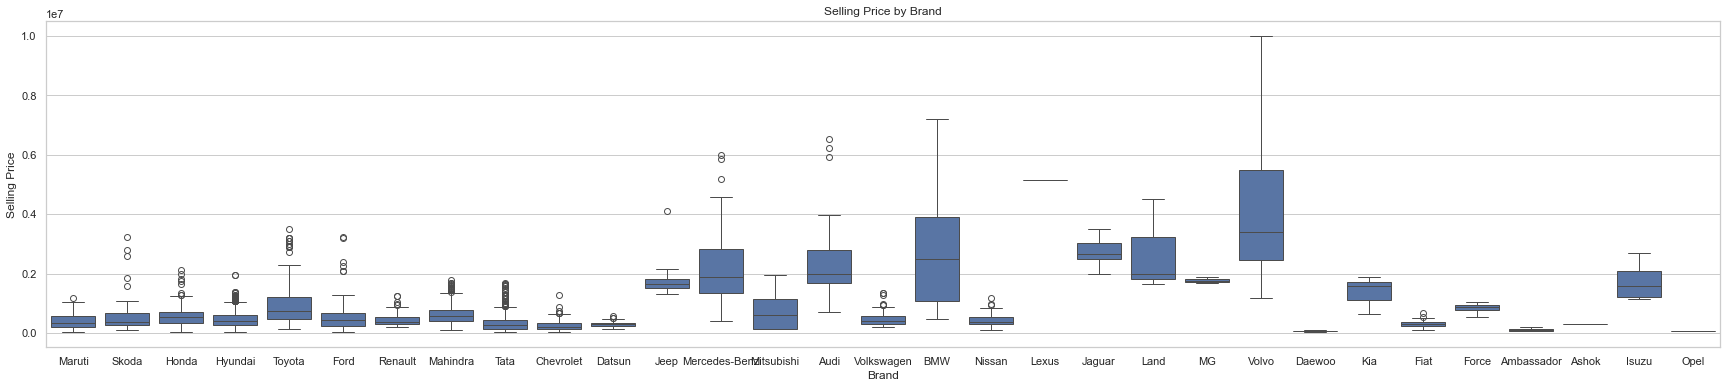

In [339]:
plt.figure(figsize=(30, 6))
sns.boxplot(x='brands', y='selling_price', data=carData)
plt.title('Selling Price by Brand')
plt.xlabel('Brand')
plt.ylabel('Selling Price')
plt.show()

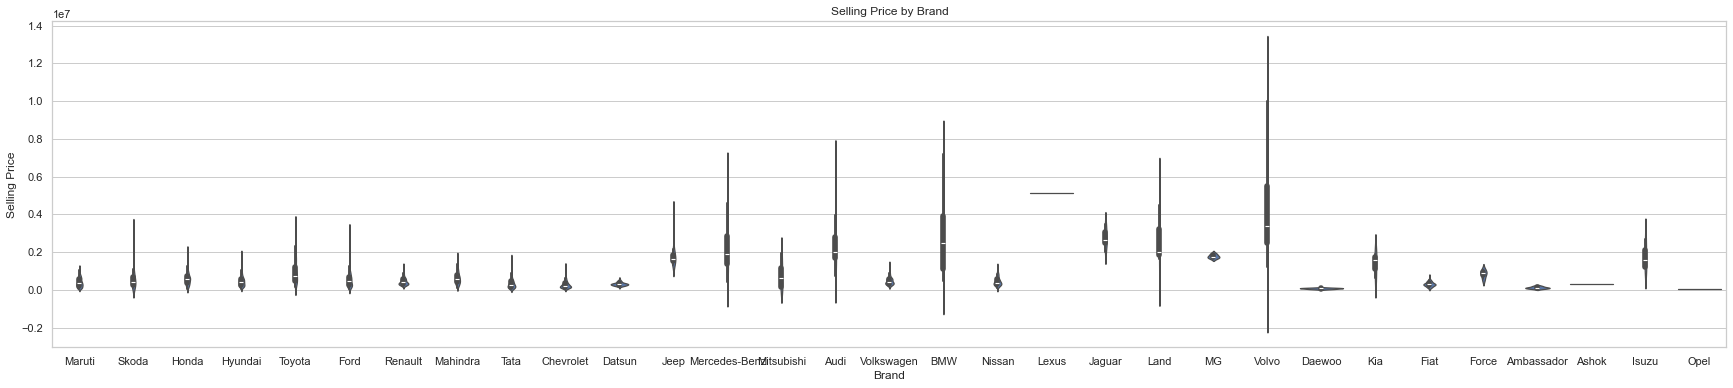

In [340]:
plt.figure(figsize=(30, 6))
sns.violinplot(x='brands', y='selling_price', data=carData)
plt.title('Selling Price by Brand')
plt.xlabel('Brand')
plt.ylabel('Selling Price')
plt.show()

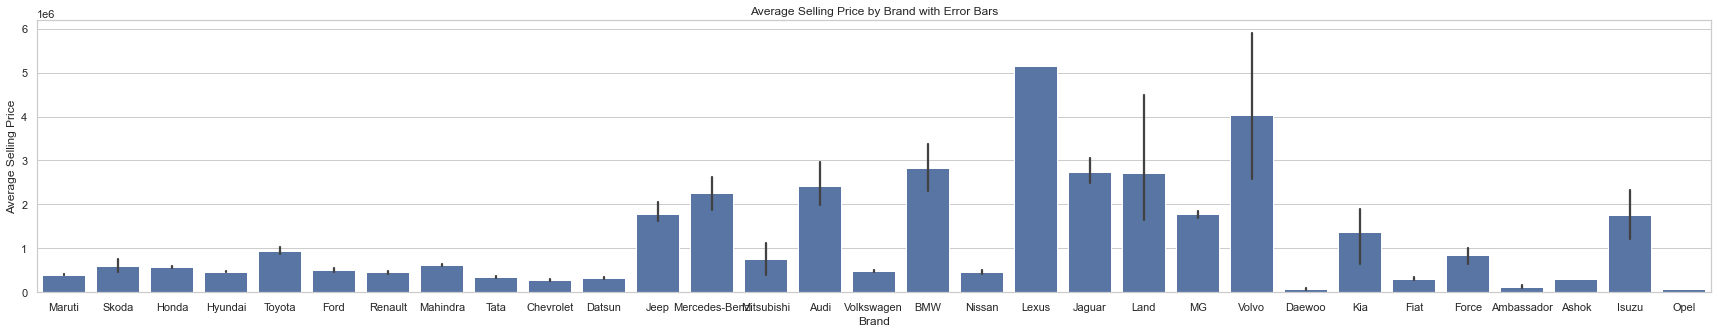

In [341]:
plt.figure(figsize=(30, 5))
sns.barplot(x='brands', y='selling_price', data=carData)
plt.title('Average Selling Price by Brand with Error Bars')
plt.xlabel('Brand')
plt.ylabel('Average Selling Price')
plt.show()

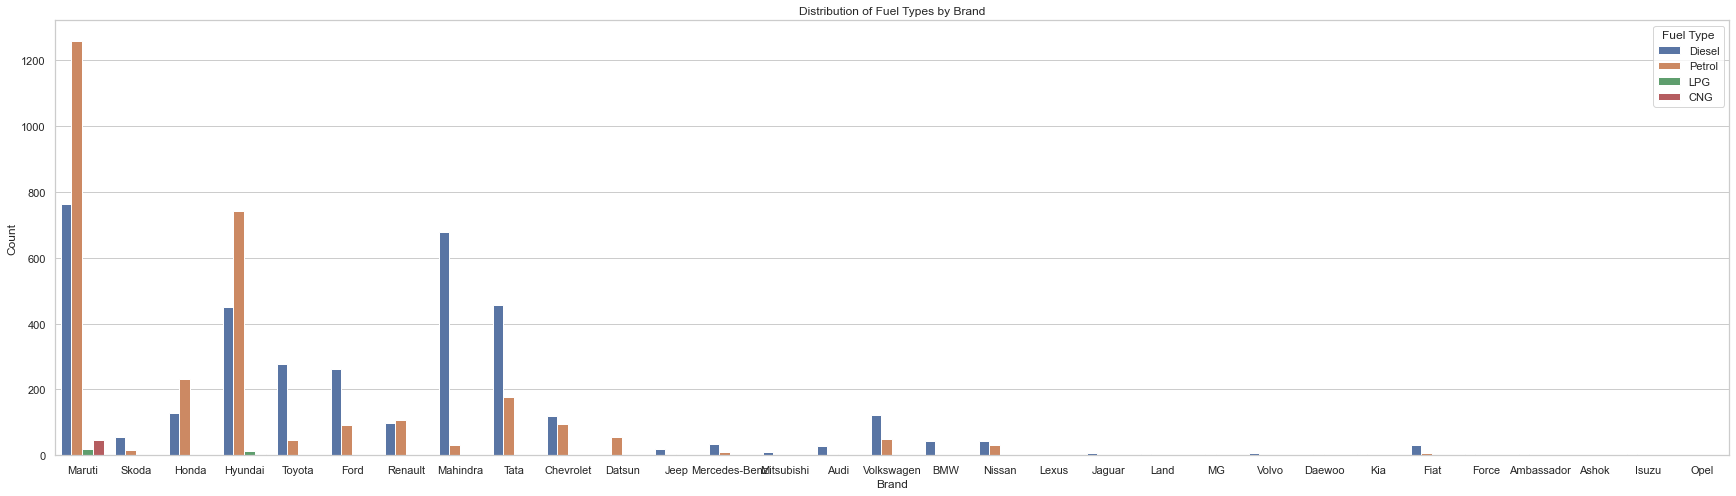

In [342]:
# Create the bar plot
plt.figure(figsize=(30, 8))
sns.countplot(x='brands', hue='fuel', data=carData)
plt.title('Distribution of Fuel Types by Brand')
plt.xlabel('Brand')
plt.ylabel('Count')
plt.legend(title='Fuel Type')
plt.show()

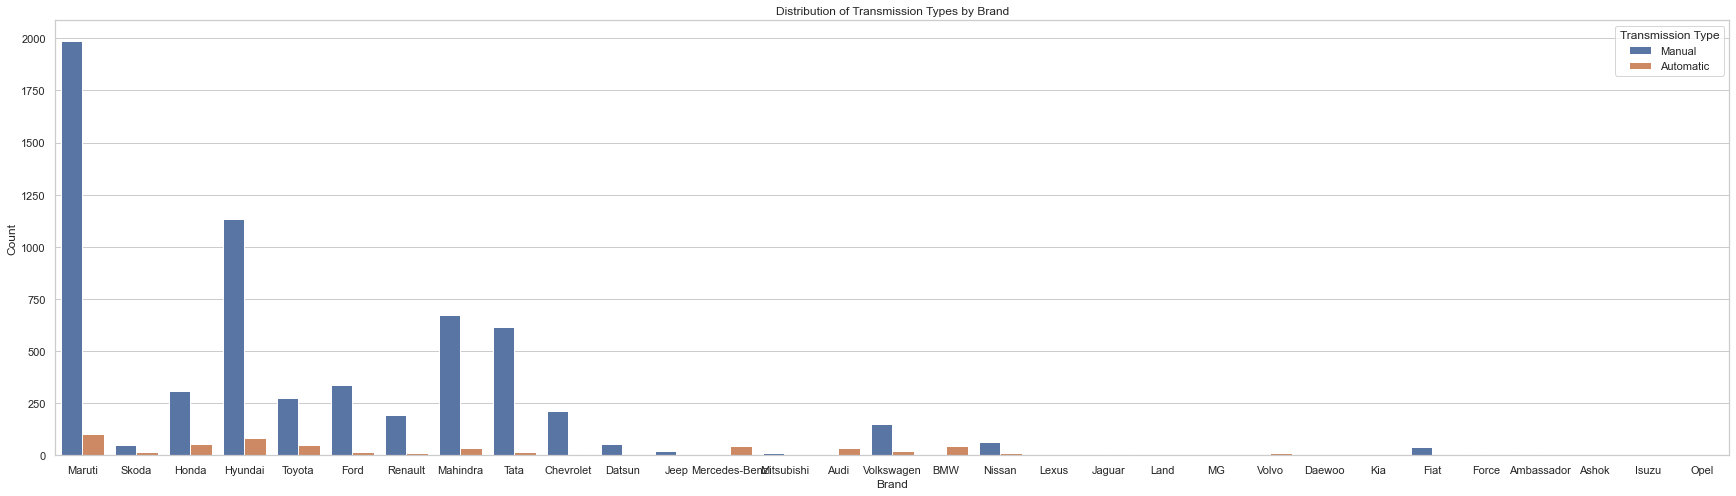

In [343]:
plt.figure(figsize=(30, 8))
sns.countplot(x='brands', hue='transmission', data=carData)
plt.title('Distribution of Transmission Types by Brand')
plt.xlabel('Brand')
plt.ylabel('Count')
plt.legend(title='Transmission Type')
plt.show()

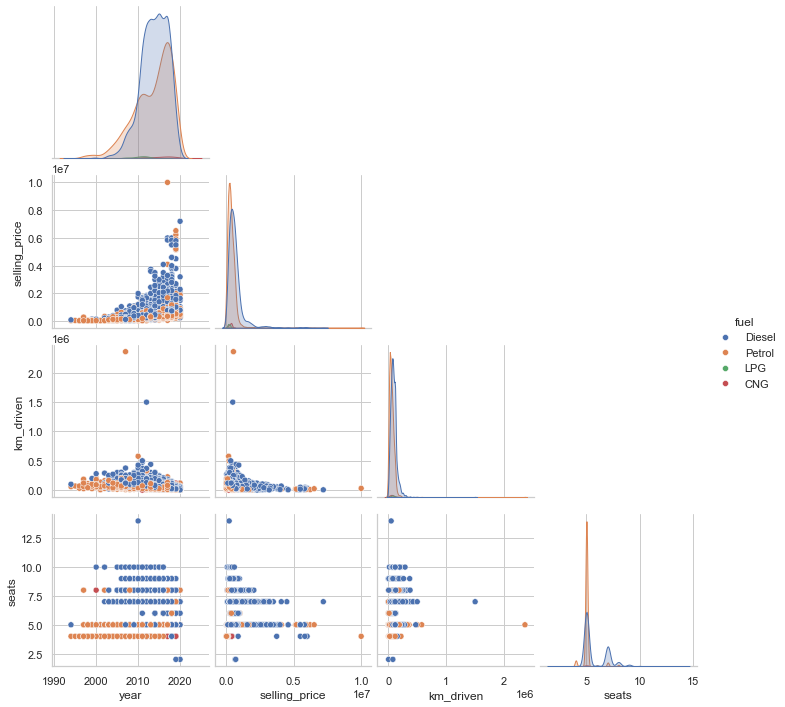

In [344]:
# plt.figure(figsize=(30, 10))
sns.pairplot(carData, hue='fuel', corner=True)
plt.show()

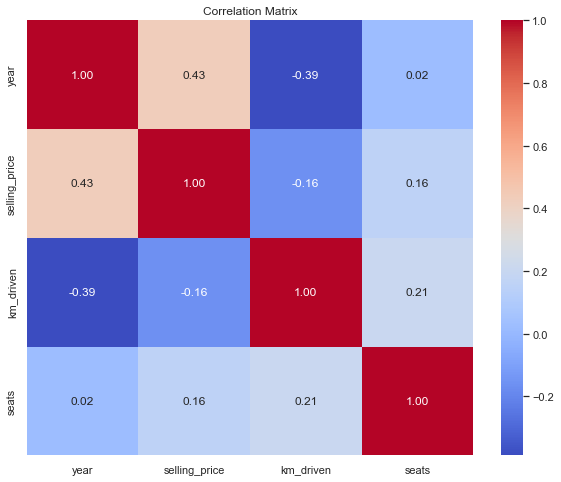

In [345]:
plt.figure(figsize=(10, 8))
sns.heatmap(carData.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

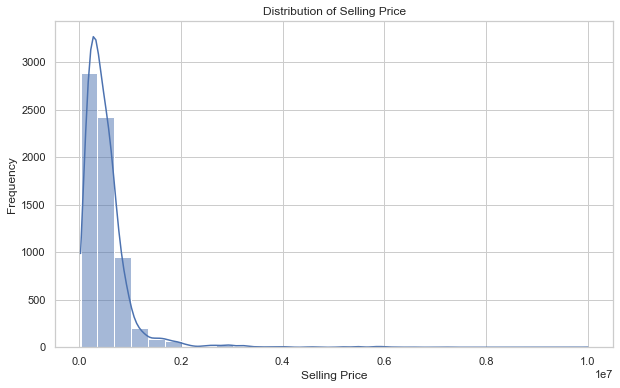

In [346]:
# Distribution plot for 'selling_price'
plt.figure(figsize=(10, 6))
sns.histplot(carData['selling_price'], kde=True, bins=30)
plt.title('Distribution of Selling Price')
plt.xlabel('Selling Price')
plt.ylabel('Frequency')
plt.show()

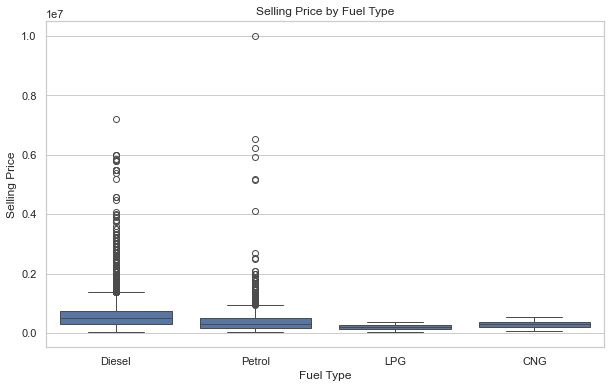

In [347]:
# Boxplot to show distribution of 'selling_price' with respect to 'fuel'
plt.figure(figsize=(10, 6))
sns.boxplot(x='fuel', y='selling_price', data=carData)
plt.title('Selling Price by Fuel Type')
plt.xlabel('Fuel Type')
plt.ylabel('Selling Price')
plt.show()

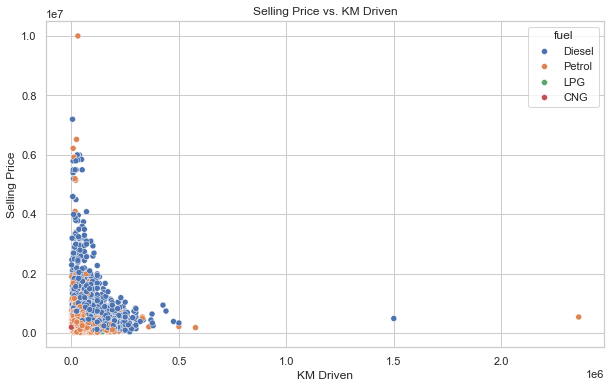

In [348]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='km_driven', y='selling_price', hue='fuel', data=carData)
plt.title('Selling Price vs. KM Driven')
plt.xlabel('KM Driven')
plt.ylabel('Selling Price')
plt.show()

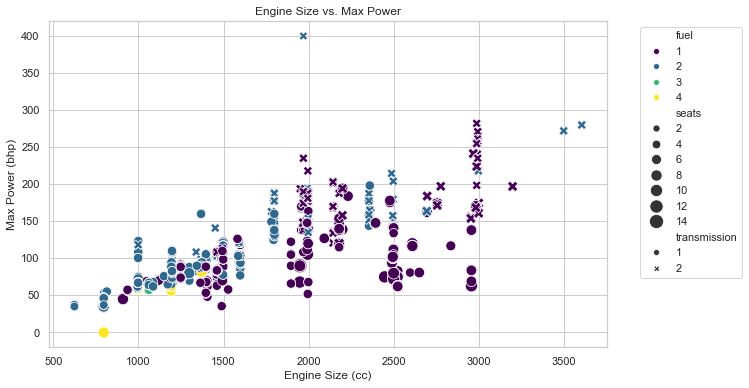

In [349]:
sns.set(style='whitegrid')

# Customize a scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x='engine', y='max_power', hue='fuel', style='transmission', size='seats', data=cars_data, palette='viridis', sizes=(50, 200))
plt.title('Engine Size vs. Max Power')
plt.xlabel('Engine Size (cc)')
plt.ylabel('Max Power (bhp)')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

In [350]:
style_list = ['Diesel', 'Petrol', 'LPG', 'CNG']

# Ensure the 'cars_data' DataFrame contains the necessary columns and values
if 'fuel' in cars_data.columns and any(style in cars_data['fuel'].values for style in style_list):
    sns.pairplot(data=cars_data.loc[cars_data['fuel'].isin(style_list)], hue='fuel', corner=True)
    plt.show()
else:
    print("The 'cars_data' DataFrame does not contain the 'fuel' column or the specified styles.")

The 'cars_data' DataFrame does not contain the 'fuel' column or the specified styles.


C:\Users\MAAZAH~1\AppData\Local\Temp/ipykernel_26460/3672121348.py:4: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if 'fuel' in cars_data.columns and any(style in cars_data['fuel'].values for style in style_list):


In [351]:
corr=cars_data.corr()
corr


,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats,brands,car_names,insurance
year,1.000000,0.427473,-0.454649,-0.045656,0.148106,0.143963,-0.480009,0.366689,-0.019108,0.161213,0.023628,0.034405,0.005265,0.004103
selling_price,0.427473,1.000000,-0.194861,-0.245786,0.250454,0.465555,-0.209356,-0.108361,0.442954,0.692398,0.158158,0.251716,0.101163,-0.002133
km_driven,-0.454649,-0.194861,1.000000,-0.306912,-0.148777,-0.140180,0.302785,-0.231055,0.302628,0.044300,0.247277,0.059566,0.027337,0.006174
fuel,-0.045656,-0.245786,-0.306912,1.000000,-0.019918,0.004999,-0.011844,-0.037445,-0.510550,-0.329092,-0.341037,-0.277616,-0.105917,-0.008792
seller_type,0.148106,0.250454,-0.148777,-0.019918,1.000000,0.213713,-0.151707,0.001592,0.065749,0.187482,-0.040786,0.047975,0.011976,0.000040
transmission,0.143963,0.465555,-0.140180,0.004999,0.213713,1.000000,-0.076888,-0.173588,0.219648,0.441715,-0.019375,0.174509,0.114325,-0.011912
owner,-0.480009,-0.209356,0.302785,-0.011844,-0.151707,-0.076888,1.000000,-0.188885,0.033816,-0.052095,0.008115,-0.013386,-0.001147,-0.004285
mileage,0.366689,-0.108361,-0.231055,-0.037445,0.001592,-0.173588,-0.188885,1.000000,-0.578416,-0.377250,-0.459517,-0.273505,-0.251138,0.003068
engine,-0.019108,0.442954,0.302628,-0.510550,0.065749,0.219648,0.033816,-0.578416,1.000000,0.683445,0.657664,0.369501,0.268359,-0.005598
max_power,0.161213,0.692398,0.044300,-0.329092,0.187482,0.441715,-0.052095,-0.377250,0.683445,1.000000,0.257379,0.348563,0.163003,0.012760


In [352]:

corr.style.background_gradient(cmap ='coolwarm')

,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats,brands,car_names,insurance
year,1.000000,0.427473,-0.454649,-0.045656,0.148106,0.143963,-0.480009,0.366689,-0.019108,0.161213,0.023628,0.034405,0.005265,0.004103
selling_price,0.427473,1.000000,-0.194861,-0.245786,0.250454,0.465555,-0.209356,-0.108361,0.442954,0.692398,0.158158,0.251716,0.101163,-0.002133
km_driven,-0.454649,-0.194861,1.000000,-0.306912,-0.148777,-0.140180,0.302785,-0.231055,0.302628,0.044300,0.247277,0.059566,0.027337,0.006174
fuel,-0.045656,-0.245786,-0.306912,1.000000,-0.019918,0.004999,-0.011844,-0.037445,-0.510550,-0.329092,-0.341037,-0.277616,-0.105917,-0.008792
seller_type,0.148106,0.250454,-0.148777,-0.019918,1.000000,0.213713,-0.151707,0.001592,0.065749,0.187482,-0.040786,0.047975,0.011976,0.000040
transmission,0.143963,0.465555,-0.140180,0.004999,0.213713,1.000000,-0.076888,-0.173588,0.219648,0.441715,-0.019375,0.174509,0.114325,-0.011912
owner,-0.480009,-0.209356,0.302785,-0.011844,-0.151707,-0.076888,1.000000,-0.188885,0.033816,-0.052095,0.008115,-0.013386,-0.001147,-0.004285
mileage,0.366689,-0.108361,-0.231055,-0.037445,0.001592,-0.173588,-0.188885,1.000000,-0.578416,-0.377250,-0.459517,-0.273505,-0.251138,0.003068
engine,-0.019108,0.442954,0.302628,-0.510550,0.065749,0.219648,0.033816,-0.578416,1.000000,0.683445,0.657664,0.369501,0.268359,-0.005598
max_power,0.161213,0.692398,0.044300,-0.329092,0.187482,0.441715,-0.052095,-0.377250,0.683445,1.000000,0.257379,0.348563,0.163003,0.012760


# MODEL TRAINING

In [353]:
# !pip install catboost
!pip install xgboost

from sklearn.metrics import mean_squared_error, r2_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression, Ridge,Lasso
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import RandomizedSearchCV
# from catboost import CatBoostRegressor
from xgboost import XGBRegressor
import warnings

In [354]:
# cars_data['km_driven']>100000
count=(cars_data['km_driven']>1000000).sum()
count
mask = cars_data['km_driven'] > 1000000

# Drop rows where km_driven is greater than 1,000,000
cars_data = cars_data.drop(cars_data[mask].index)

In [355]:
X = cars_data.drop(columns=['selling_price'])
y =cars_data['selling_price']

In [356]:
# from sklearn.compose import ColumnTransformer
# from sklearn.preprocessing import StandardScaler, OneHotEncoder
# X = preprocessor.fit_transform(X)

In [357]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [358]:
def evaluate_model(true, predicted):
    mae = mean_absolute_error(true, predicted)
    mse = mean_squared_error(true, predicted)
    rmse = np.sqrt(mean_squared_error(true, predicted))
    r2_square = r2_score(true, predicted)
    return mae, rmse, r2_square

In [359]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6716 entries, 0 to 6715
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   year          6716 non-null   int64  
 1   km_driven     6716 non-null   int64  
 2   fuel          6716 non-null   int64  
 3   seller_type   6716 non-null   int64  
 4   transmission  6716 non-null   int64  
 5   owner         6716 non-null   int64  
 6   mileage       6716 non-null   float64
 7   engine        6716 non-null   float64
 8   max_power     6716 non-null   float64
 9   seats         6716 non-null   float64
 10  brands        6716 non-null   int64  
 11  car_names     6716 non-null   int64  
 12  insurance     6716 non-null   int64  
dtypes: float64(4), int64(9)
memory usage: 682.2 KB


In [360]:
models = {
    "Linear Regression": LinearRegression(),
    "Lasso": Lasso(),
    "Ridge": Ridge(),
    "K-Neighbors Regressor": KNeighborsRegressor(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest Regressor": RandomForestRegressor(),
    "XGBRegressor": XGBRegressor(), 
    # "CatBoosting Regressor": CatBoostRegressor(verbose=False),
    "AdaBoost Regressor": AdaBoostRegressor()
}
model_list = []
r2_list =[]

for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(x_train, y_train) # Train model

    # Make predictions
    y_train_pred = model.predict(x_train)
    y_test_pred = model.predict(x_test)
    
    # Evaluate Train and Test dataset
    model_train_mae , model_train_rmse, model_train_r2 = evaluate_model(y_train, y_train_pred)

    model_test_mae , model_test_rmse, model_test_r2 = evaluate_model(y_test, y_test_pred)

    
    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])
    
    print('Model performance for Training set')
    print("- Root Mean Squared Error: {:.4f}".format(model_train_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_train_mae))
    print("- R2 Score: {:.4f}".format(model_train_r2))

    print('----------------------------------')
    
    print('Model performance for Test set')
    print("- Root Mean Squared Error: {:.4f}".format(model_test_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_test_mae))
    print("- R2 Score: {:.4f}".format(model_test_r2))
    r2_list.append(model_test_r2)
    
    print('='*35)
    print('\n')

Linear Regression
Model performance for Training set
- Root Mean Squared Error: 328440.7785
- Mean Absolute Error: 177658.8187
- R2 Score: 0.6158
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 297940.9413
- Mean Absolute Error: 176268.7565
- R2 Score: 0.6414


Lasso
Model performance for Training set
- Root Mean Squared Error: 328440.7785
- Mean Absolute Error: 177658.7521
- R2 Score: 0.6158
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 297940.9000
- Mean Absolute Error: 176268.4718
- R2 Score: 0.6414


Ridge
Model performance for Training set
- Root Mean Squared Error: 328440.8681
- Mean Absolute Error: 177656.7028
- R2 Score: 0.6158
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 297939.6235
- Mean Absolute Error: 176261.7025
- R2 Score: 0.6414


K-Neighbors Regressor
Model performance for Training set
- Root Mean Squared Error: 320070.7514
- Mean 

In [363]:
pd.DataFrame(list(zip(model_list, r2_list)), columns=['Model Name', 'R2_Score']).sort_values(by=["R2_Score"],ascending=False)

,Model Name,R2_Score
6,XGBRegressor,0.936170
5,Random Forest Regressor,0.934748
4,Decision Tree,0.900635
2,Ridge,0.641435
1,Lasso,0.641432
0,Linear Regression,0.641431
7,AdaBoost Regressor,0.550815
3,K-Neighbors Regressor,0.495851


In [364]:
lin_model = LinearRegression(fit_intercept=True)
lin_model = lin_model.fit(x_train, y_train)
y_pred = lin_model.predict(x_test)
score = r2_score(y_test, y_pred)*100
print(" Accuracy of the model is %.2f" %score)

 Accuracy of the model is 64.14


In [366]:
model = LinearRegression()

In [369]:
model.fit(x_train, y_train)

LinearRegression()

In [370]:
model.score(x_test, y_test)

0.6414314319802377

In [387]:
predict = model.predict(x_test)

In [389]:
predict

array([ 794929.92116123,  724828.46681441,  365684.55436442, ...,
       1778568.4080001 ,  928539.85986806,  529638.14834947])

In [377]:
x_train.head(1)

,year,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats,brands,car_names,insurance
2489,2018,10000,2,1,1,1,20.89,1197.0,81.8,5.0,1,90,1


In [378]:
input_data_model = pd.DataFrame(
    [[2022,12000,1,1,1,1,12.99,2494.0,100.6,5.0,8,142,1]],
    columns=['year','km_driven','fuel','seller_type','transmission','owner','mileage','engine','max_power','seats','brands','car_names','insurance'])

In [379]:
input_data_model

,year,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats,brands,car_names,insurance
0,2022,12000,1,1,1,1,12.99,2494.0,100.6,5.0,8,142,1


In [392]:
print("Predicted price for these specific features will be: {}".format(model.predict(input_data_model)))


Predicted price for these specific features will be: [982304.20307656]


In [394]:
import pickle as pk

In [395]:
pk.dump(XGBRegressor,open('model.pkl','wb'))